# Fuel assembly: 2A

## Import modules

In [1]:
import sys
import os

import openmc
import openmc.mgxs as mgxs

import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
from IPython.display import Image
import glob

## Add location of OpenMC XS executable, setup ENDF xs path

In [2]:
import os

# Add path to OpenMC binary
# os.environ['PATH'] += r':/path/to/openmc/bin'
os.environ['PATH'] += r':/Users/jean.ragusa/repo/openmc/local/bin'

# Add location of OpenMC xs data
%env OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml


## Start model

In [3]:
model=openmc.Model()

### Define Materials

In [4]:
uo2 = openmc.Material(name='uo2')

uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')

uo2.set_density('g/cm3', 10.257 )

uo2.temperature = 565

In [5]:
zirconium = openmc.Material(name="zirconium")

zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')

zirconium.set_density('g/cm3',  6.56)

zirconium.temperature = 565

In [6]:
water = openmc.Material(name="water")

water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')

water.add_s_alpha_beta('c_H_in_H2O')

water.set_density('g/cm3', 0.743)

water.temperature=565

In [7]:
helium = openmc.Material(name="helium")

helium.add_nuclide('He4',1, 'ao')

helium.set_density('g/cm3', 0.178E-03 )

helium.temperature=565

In [8]:
model.materials = openmc.Materials([uo2, zirconium, water,helium]) 

print(model.materials)

[Material
	ID             =	1
	Name           =	uo2
	Temperature    =	565
	Density        =	10.257 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	6.11864e-06  [ao]
	U235           =	0.000718132  [ao]
	U236           =	3.29861e-06  [ao]
	U238           =	0.0221546    [ao]
	O16            =	0.0457642    [ao]
, Material
	ID             =	2
	Name           =	zirconium
	Temperature    =	565
	Density        =	6.56 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.0218865    [ao]
	Zr91           =	0.00477292   [ao]
	Zr92           =	0.00729551   [ao]
	Zr94           =	0.00739335   [ao]
	Zr96           =	0.0011911    [ao]
	Sn112          =	4.68066e-06  [ao]
	Sn114          =	3.18478e-06  [ao]
	Sn115          =	1.64064e-06  [ao]
	Sn116          =	7.01616e-05  [ao]
	Sn117          =	3.70592e-05  [ao]
	Sn118          =	0.000116872  [ao]
	Sn119          =	4.14504e-05 

### Create fuel pin: fuel, clad, water (no gap)

In [9]:
def pincell(family):
    
    pitch = 1.26

    fuel_outer_radius = openmc.ZCylinder(r=0.4096)
    clad_inner_radius = openmc.ZCylinder(r=0.418)
    clad_outer_radius = openmc.ZCylinder(r=0.475)

    left   = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right  = openmc.XPlane( pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top    = openmc.YPlane( pitch/2, boundary_type='transmission')

    fuel_region  = -fuel_outer_radius
    gap_region   = +fuel_outer_radius & -clad_inner_radius
    clad_region  = +clad_inner_radius & -clad_outer_radius
    water_region = +left & -right & +bottom & -top & +clad_outer_radius

    fuel = openmc.Cell(name='fuel'+'_'+family)
    fuel.fill = uo2
    fuel.region = fuel_region
    
    gap = openmc.Cell(name='gap'+'_'+family)
    gap.region = gap_region
    gap.fill = helium     
    
    clad = openmc.Cell(name='clad'+'_'+family)
    clad.fill = zirconium
    clad.region = clad_region
    
    moderator = openmc.Cell(name='moderator'+'_'+family)
    moderator.fill = water
    moderator.region = water_region 
    
    u = openmc.Universe(name='u'+'_'+family, cells=(fuel, clad, moderator,gap))
    
    return(u,fuel,clad,moderator,gap)

### Create guide tube

In [10]:
def guide(family):
    
    pitch = 1.26

    clad_inner_radius = openmc.ZCylinder(r=0.561)
    clad_outer_radius = openmc.ZCylinder(r=0.602)
    
    left   = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right  = openmc.XPlane( pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top    = openmc.YPlane( pitch/2, boundary_type='transmission')       
    
    water_guide_region= -clad_inner_radius

    clad_region = +clad_inner_radius & -clad_outer_radius

    water_region = +left & -right & +bottom & -top & +clad_outer_radius
    
    water_guide = openmc.Cell(name='water'+'_'+family)
    water_guide.fill = water
    water_guide.region = water_guide_region
 
    clad = openmc.Cell(name='clad'+'_'+family)
    clad.fill = zirconium
    clad.region = clad_region

    moderator = openmc.Cell(name='moderator'+'_'+family)
    moderator.fill = water
    moderator.region = water_region 
    
    u = openmc.Universe(name='u_guide'+'_'+family, cells=(water_guide, clad, moderator))
    
    return(u,water_guide,water_guide,clad,moderator)

### Create instrumentation tube

In [12]:
def instru(family):
    pitch = 1.26

    clad_inner_radius = openmc.ZCylinder(r=0.559)
    clad_outer_radius = openmc.ZCylinder(r=0.605)
    
    left   = openmc.XPlane(-pitch/2, boundary_type='transmission')
    right  = openmc.XPlane( pitch/2, boundary_type='transmission')
    bottom = openmc.YPlane(-pitch/2, boundary_type='transmission')
    top    = openmc.YPlane( pitch/2, boundary_type='transmission')       
    
    water_guide_region = -clad_inner_radius

    clad_region = +clad_inner_radius & -clad_outer_radius
    
    water_region = +left & -right & +bottom & -top & +clad_outer_radius
    
    water_guide = openmc.Cell(name='water'+'_'+family)
    water_guide.fill = water
    water_guide.region = water_guide_region
    
    clad = openmc.Cell(name='clad'+'_'+family)
    clad.fill = zirconium
    clad.region = clad_region
    
    moderator = openmc.Cell(name='moderator'+'_'+family)
    moderator.fill = water
    moderator.region = water_region 
    
    u = openmc.Universe(name='u_guide'+'_'+family, cells=(water_guide, clad, moderator))
    
    return(u,water_guide,water_guide,clad,moderator)

### Mapping onto the lattice

In [13]:
GT=[(5,2),(8,2),(3,3),(2,5),(5,5),(8,5),(2,8),(5,8)]
IT=[(8,8)]

GT_left=[]
GT_full=[]
for X in GT:
    GT_left.append((X[0],X[1]))
    GT_left.append((X[0],16-X[1]))
for X in GT_left:
    GT_full.append((X[0],X[1]))
    GT_full.append((16-X[0],X[1]))    
GT_full = list(set(GT_full))
# print(np.array(GT_full)+(1,1))

### Generate cells

In [15]:
pincell_1_family = pincell('pincell')
guide_1_family   = guide('guide')
instru_1_family  = instru('instru')

### Generate assembly

In [69]:
assembly = openmc.RectLattice()
pitch = 1.26

dr = 0.04 # cm of water that is outside assembly

size = 17 #size of the assembly 
assembly.pitch = (pitch,pitch)

assembly.lower_left = (-size*pitch/2, -size*pitch/2)


A = np.empty((size, size), dtype=openmc.universe.Universe)

for ix in range(size):
    for iy in range(size):
        if (ix,iy) in GT_full : 
            A[ix][iy]=guide_1_family[0]
        elif (ix,iy) in IT :
            A[ix][iy]=instru_1_family[0]
        else:
            A[ix][iy]=pincell_1_family[0]    

# print(A)           
        
assembly.universes = A

moderator_outside = openmc.Cell(name='water_outside')
moderator_outside.fill = water

all_water = openmc.Universe()
all_water.add_cell(moderator_outside)
assembly.outer=all_water

height = 385.1
# 1/4 assembly
min_x = openmc.XPlane(x0=-(size/2*pitch+dr), boundary_type='reflective')
max_x = openmc.XPlane(x0=0, boundary_type='reflective')
min_y = openmc.YPlane(y0=0, boundary_type='reflective')
max_y = openmc.YPlane(y0=+(size/2*pitch+dr), boundary_type='reflective')
min_z = openmc.ZPlane(z0=-height/2, boundary_type='reflective')
max_z = openmc.ZPlane(z0=+height/2, boundary_type='reflective')

root_cell = openmc.Cell(name='root cell', fill=assembly)
root_cell.region = +min_x & -max_x & +min_y & -max_y & +min_z & -max_z

model.geometry.root_universe = openmc.Universe(name='root universe')
model.geometry.root_universe.add_cell(root_cell)

### Plot

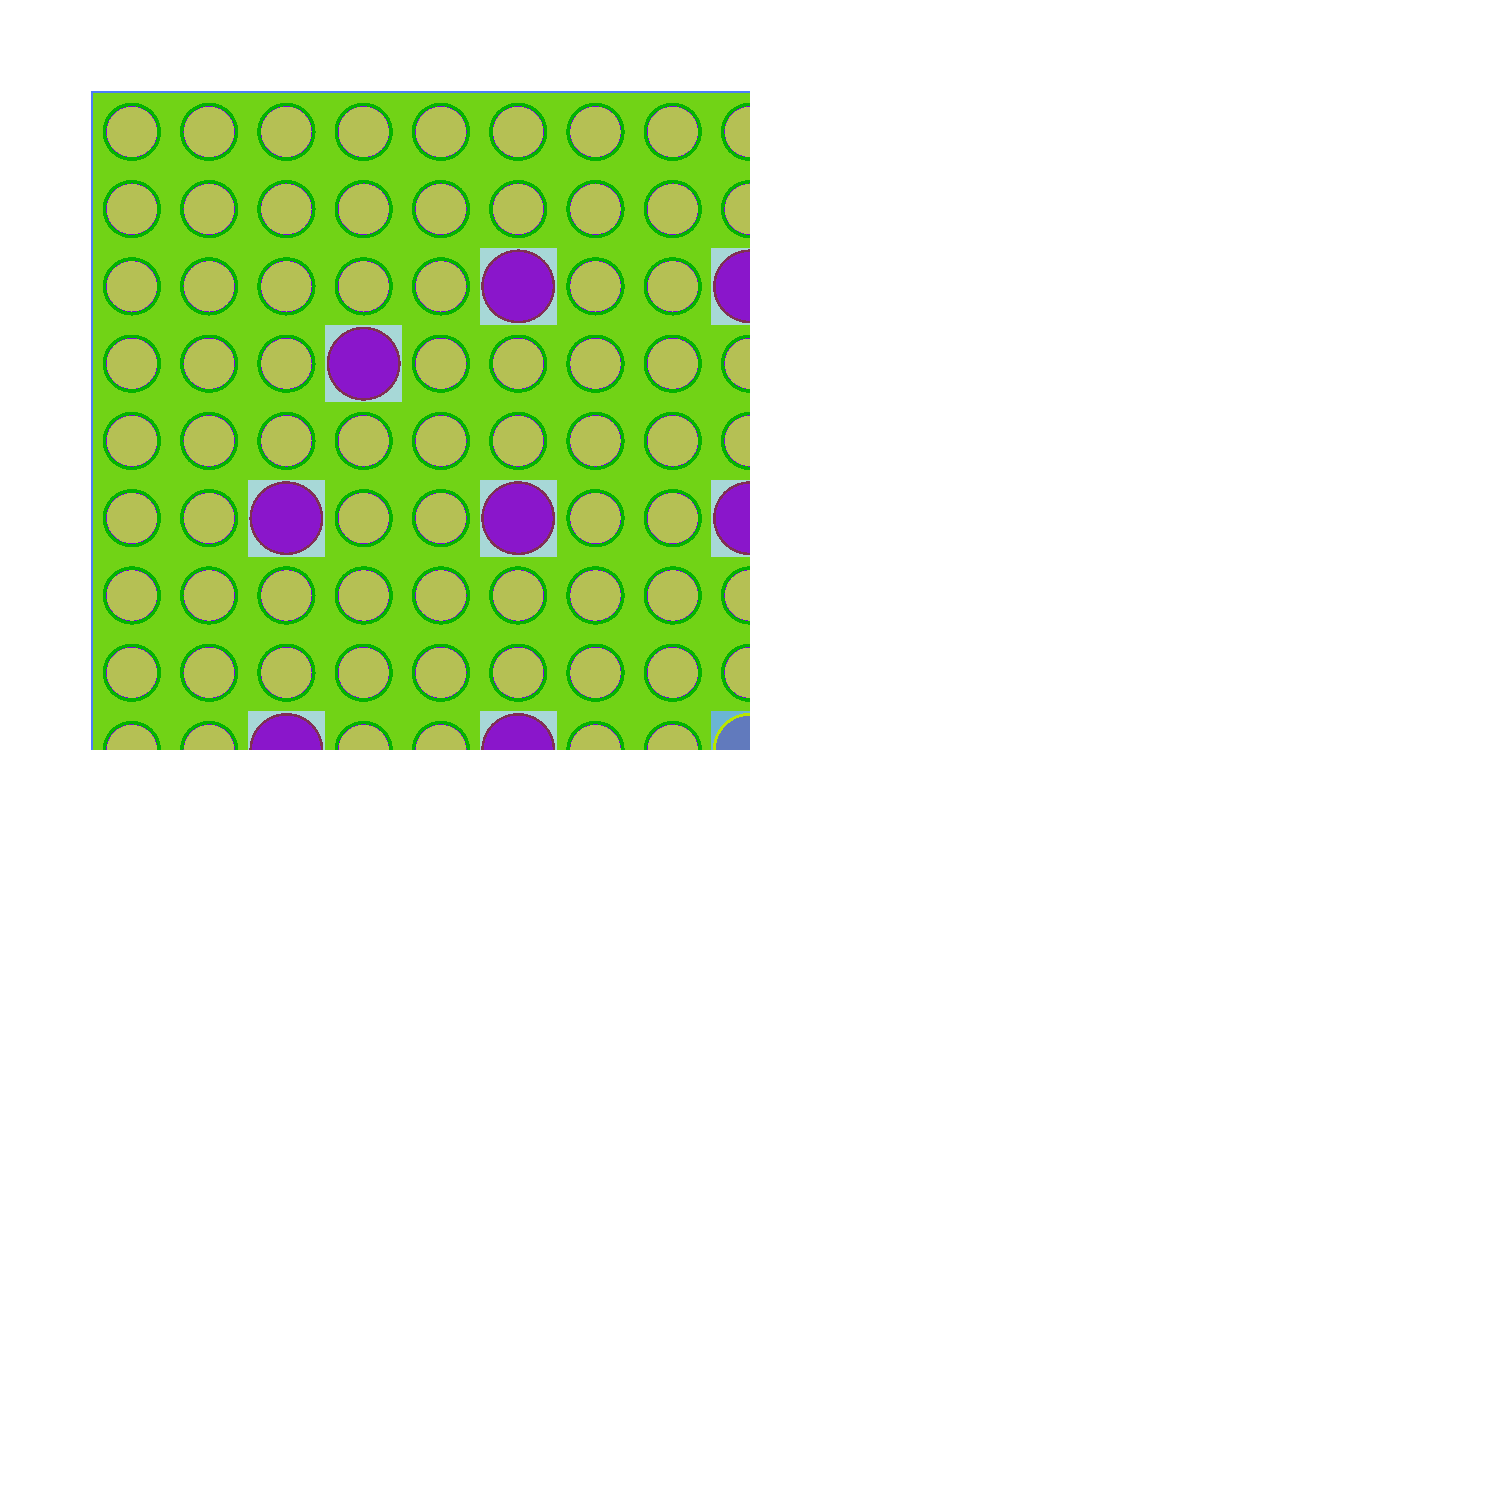

In [78]:
# export needed for plotting
model.materials.export_to_xml()
model.geometry.export_to_xml()

plot = openmc.Plot()
plot.filename = '2A'
plot.from_geometry(model.geometry)
plot.pixels = (1500, 1500)

pitch_assembly = size*pitch + dr 

plot.width = (pitch_assembly+3, pitch_assembly+3)

plot.origin = (0., 0., 0.)
plot.color_by = 'cell'

model.plots = openmc.Plots([plot])
plot.to_ipython_image(openmc_exec='openmc', cwd='./')

###  Settings

In [79]:
settings = openmc.Settings()

bounds = [-pitch_assembly/2, 0, -height/2, 0, +pitch_assembly/2, height/2]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)

source = openmc.IndependentSource(space=uniform_dist)

settings.source = source

settings.batches = 50
settings.inactive = 20
settings.particles = 20000
settings.keff_trigger = {'type':'std_dev','threshold':0.00030}
settings.trigger_active = True
settings.trigger_max_batches = 50000
settings.output = {'tallies':True}

settings.temperature['method'] = 'interpolation'

model.settings = settings

### Tallies

In [80]:
tallies = openmc.Tallies()
model.tallies = tallies

### Define and choose energy group

In [81]:
egroup_name = 'SHEM-361'
egroup = openmc.mgxs.GROUP_STRUCTURES[egroup_name]

### Create MGXS tallies for mgxs directory

In [94]:
pn = 7
    
mgxs_lib_ = openmc.mgxs.Library(model.geometry)
groups = openmc.mgxs.EnergyGroups(egroup)

mgxs_lib_.energy_groups = groups
mgxs_lib_.scatter_format = "legendre"
mgxs_lib_.mgxs_types = ['total', 'absorption', 'nu-fission', 'fission' ,'chi', \
                       'consistent nu-scatter matrix', 'multiplicity matrix','kappa-fission']

mgxs_lib_.legendre_order = pn
if pn == 0:
    mgxs_lib_.correction = None

mgxs_lib_.by_nuclide = False
mgxs_lib_.domain_type = 'cell'
mgxs_lib_.domains = model.geometry.get_all_material_cells().values()

all_cell_order=[]
for cell in (mgxs_lib_.domains):
    all_cell_order.append(cell.name)
# print(mgxs_lib_.domains)
mgxs_lib_.build_library()
print(all_cell_order)
    
mgxs_lib_.build_library()
mgxs_lib_.check_library_for_openmc_mgxs()

mgxs_lib_.add_to_tallies_file(tallies, merge=True)
    


['fuel_pincell', 'clad_pincell', 'moderator_pincell', 'gap_pincell', 'water_guide', 'clad_guide', 'moderator_guide', 'water_instru', 'clad_instru', 'moderator_instru', 'water_outside']


/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


### Create power tally

In [21]:
## model.export_to_model_xml('model_iso.xml')

### Run OpenMC model

In [85]:
statepoint_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       56/1    1.18183    1.18275 +/- 0.00178
 Triggers unsatisfied, max unc./thresh. is 4.060970116396498 for eigenvalue
 The estimated number of batches is 614
       57/1    1.18546    1.18282 +/- 0.00174
 Triggers unsatisfied, max unc./thresh. is 3.951394445983804 for eigenvalue
 The estimated number of batches is 598
       58/1    1.19030    1.18302 +/- 0.00170
 Triggers unsatisfied, max unc./thresh. is 3.8792978205991444 for eigenvalue
 The estimated number of batches is 592
       59/1    1.17136    1.18272 +/- 0.00169
 Triggers unsatisfied, max unc./thresh. is 3.839926410378433 for eigenvalue
 The estimated number of batches is 596
       60/1    1.18982    1.18290 +/- 0.00165
 Triggers unsatisfied, max unc./thresh. is 3.7646501260331218 for eigenvalue
 The estimated number of batches is 587
       61/1    1.18320    1.18291 +/- 0.00161
 Triggers unsatisfied, max unc./thresh. is 3.7165390429588423 for eigenvalue
 The estimated number of batches is 587
       62/1    1.16798   

      107/1    1.20226    1.18252 +/- 0.00116
 Triggers unsatisfied, max unc./thresh. is 2.158774380940066 for eigenvalue
 The estimated number of batches is 426
      108/1    1.18178    1.18251 +/- 0.00115
 Triggers unsatisfied, max unc./thresh. is 2.1618970468920007 for eigenvalue
 The estimated number of batches is 432
      109/1    1.18371    1.18252 +/- 0.00114
 Triggers unsatisfied, max unc./thresh. is 2.141584075501278 for eigenvalue
 The estimated number of batches is 429
      110/1    1.16537    1.18233 +/- 0.00114
 Triggers unsatisfied, max unc./thresh. is 2.1190349893296907 for eigenvalue
 The estimated number of batches is 425
      111/1    1.19133    1.18243 +/- 0.00113
 Triggers unsatisfied, max unc./thresh. is 2.097843354282411 for eigenvalue
 The estimated number of batches is 421
      112/1    1.19109    1.18253 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 2.0806723564399188 for eigenvalue
 The estimated number of batches is 419
      113/1    1.18486   

      158/1    1.18632    1.18218 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.8069526516446093 for eigenvalue
 The estimated number of batches is 471
      159/1    1.17405    1.18212 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.797249586380654 for eigenvalue
 The estimated number of batches is 469
      160/1    1.18472    1.18214 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.7843129512629416 for eigenvalue
 The estimated number of batches is 466
      161/1    1.17396    1.18208 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.771876093148812 for eigenvalue
 The estimated number of batches is 463
      162/1    1.18143    1.18207 +/- 0.00088
 Triggers unsatisfied, max unc./thresh. is 1.7604779723172892 for eigenvalue
 The estimated number of batches is 461
      163/1    1.18617    1.18210 +/- 0.00087
 Triggers unsatisfied, max unc./thresh. is 1.747798496588677 for eigenvalue
 The estimated number of batches is 457
      164/1    1.17519   

      209/1    1.17656    1.18214 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.516774601992346 for eigenvalue
 The estimated number of batches is 455
      210/1    1.18191    1.18214 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.510191871900566 for eigenvalue
 The estimated number of batches is 454
      211/1    1.18511    1.18215 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.5023104241287197 for eigenvalue
 The estimated number of batches is 452
      212/1    1.18645    1.18218 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.4944955852355417 for eigenvalue
 The estimated number of batches is 449
      213/1    1.17663    1.18215 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.4868439253081367 for eigenvalue
 The estimated number of batches is 447
      214/1    1.18356    1.18215 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.4795186669241185 for eigenvalue
 The estimated number of batches is 445
      215/1    1.19405  

      260/1    1.16981    1.18199 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3664369638658898 for eigenvalue
 The estimated number of batches is 469
      261/1    1.18946    1.18202 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3613549687802236 for eigenvalue
 The estimated number of batches is 467
      262/1    1.17506    1.18199 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3556920922303015 for eigenvalue
 The estimated number of batches is 465
      263/1    1.17399    1.18196 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3507661792457657 for eigenvalue
 The estimated number of batches is 464
      264/1    1.17846    1.18194 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3451766777127871 for eigenvalue
 The estimated number of batches is 462
      265/1    1.17365    1.18191 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3413408497392054 for eigenvalue
 The estimated number of batches is 461
      266/1    1.17653

      311/1    1.18458    1.18158 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.257396891401564 for eigenvalue
 The estimated number of batches is 481
      312/1    1.17596    1.18156 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.2539442159818055 for eigenvalue
 The estimated number of batches is 480
      313/1    1.18948    1.18159 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.25083388125552 for eigenvalue
 The estimated number of batches is 479
      314/1    1.18601    1.18160 +/- 0.00057
 Triggers unsatisfied, max unc./thresh. is 1.2509247787711595 for eigenvalue
 The estimated number of batches is 481
      315/1    1.17917    1.18160 +/- 0.00057
 Triggers unsatisfied, max unc./thresh. is 1.2467992774652885 for eigenvalue
 The estimated number of batches is 479
      316/1    1.18599    1.18161 +/- 0.00057
 Triggers unsatisfied, max unc./thresh. is 1.2487090383272512 for eigenvalue
 The estimated number of batches is 482
      317/1    1.17452   

      362/1    1.16725    1.18182 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1763366793129582 for eigenvalue
 The estimated number of batches is 494
      363/1    1.18631    1.18184 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1741891478403634 for eigenvalue
 The estimated number of batches is 493
      364/1    1.15461    1.18176 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.175838955058808 for eigenvalue
 The estimated number of batches is 496
      365/1    1.18465    1.18177 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1728168503052023 for eigenvalue
 The estimated number of batches is 495
      366/1    1.18838    1.18178 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1689311066485495 for eigenvalue
 The estimated number of batches is 493
      367/1    1.17759    1.18177 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1657470241672199 for eigenvalue
 The estimated number of batches is 492
      368/1    1.16440 

      413/1    1.18013    1.18182 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.076969569316636 for eigenvalue
 The estimated number of batches is 476
      414/1    1.18985    1.18184 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0765966387938797 for eigenvalue
 The estimated number of batches is 477
      415/1    1.17638    1.18183 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.074048035334271 for eigenvalue
 The estimated number of batches is 476
      416/1    1.18922    1.18185 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0711640154265947 for eigenvalue
 The estimated number of batches is 475
      417/1    1.18175    1.18185 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0685386181779146 for eigenvalue
 The estimated number of batches is 474
      418/1    1.17686    1.18183 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0656198154135128 for eigenvalue
 The estimated number of batches is 472
      419/1    1.18440  

      464/1    1.18406    1.18166 +/- 0.00048
 Triggers satisfied for batch 464
 Creating state point statepoint.00464.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 2.9180e+00 seconds
   Reading cross sections          = 2.8958e+00 seconds
 Total time in simulation          = 1.3679e+02 seconds
   Time in transport only          = 1.3430e+02 seconds
   Time in inactive batches        = 3.6021e+00 seconds
   Time in active batches          = 1.3319e+02 seconds
   Time synchronizing fission bank = 2.4167e-01 seconds
     Sampling source sites         = 2.1221e-01 seconds
     SEND/RECV source sites        = 2.9307e-02 seconds
   Time accumulating tallies       = 1.6630e+00 seconds
   Time writing statepoints        = 4.8260e-01 seconds
 Total time for finalization       = 1.0375e+01 seconds
 Total time elapsed                = 1.5013e+02 seconds
 Calculation Rate (inactive)       = 111048 particles/second
 Calcul

In [89]:
ce_spfile = f'./statepoint_{egroup_name}_ce.h5'
ce_sumfile = f'./summary_{egroup_name}_ce.h5'
print(ce_spfile)

./statepoint_SHEM-361_ce.h5


In [90]:
os.rename(statepoint_filename, ce_spfile)
os.rename('summary.h5', ce_sumfile)

In [96]:
# trick to make several runs work with jupyter
try:
    sp 
    print('sp found')
    sp.close()
except NameError:
    print('sp NOT found')

sp found


In [97]:
sp = openmc.StatePoint(ce_spfile, autolink=False)
su = openmc.Summary(ce_sumfile)
sp.link_with_summary(su)

In [98]:
mgxs_lib_.load_from_statepoint(sp)
    
pb_name = '2A'
mgxs_lib_.create_mg_library(xs_type='macro', xsdata_names=all_cell_order).export_to_hdf5\
('mgxs_'+pb_name+'.h5')

## Clean up by deleting unwanted files

In [99]:
import os
import re

def delete_runtime_files(directory='.'):
    """
    Deletes all files with a .xml extension, files named statepoint.NNNNN.h5 where N is a digit,
    and the file named summary.h5 in the specified directory.

    Parameters:
    directory (str): The directory to search for files. Defaults to the current directory.
    """
    
    # Regular expression pattern to match files named statepoint.NNNNN.h5
    pattern = re.compile(r'statepoint\.\d{5}\.h5')

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file has a .xml extension, matches the pattern, or is named summary.h5
        if filename.endswith('.xml') or pattern.match(filename) or filename == 'summary.h5' \
           or filename == 'tallies.out':
            # Delete the file
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Example usage:
# delete_runtime_files('/path/to/directory')  # specify the directory path if needed

In [100]:
delete_runtime_files('./')

Deleted: ./plots.xml
Deleted: ./statepoint.00050.h5
Deleted: ./model.xml
Deleted: ./tallies.out
Deleted: ./materials.xml
Deleted: ./geometry.xml
